In [1]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    ## VS Codeで実行されている場合
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    !pip install ipynbname
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
    if "%2F" in THIS_NOTEBOOK_PATH.stem:
        ## Google Colabで実行されている場合
        colab_ip = %system hostname -I   # uses colab magic to get list from bash
        colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
        colab_port = 9000                # could use 6000, 8080, or 9000
        import requests
        filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
        THIS_NOTEBOOK_PATH = Path(filename)
    else:
        ## それ以外の場合
        THIS_NOTEBOOK_PATH = THIS_NOTEBOOK_PATH

OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

In [2]:
print("File output directory:", OUTPUT_DIR)
# Create the output directory if it does not exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

File output directory: figures/_lp_norm_contours


/var/folders/rs/z4yf99dx0wx_lqfdhc3l3dt40000gn/T/ipykernel_42138/2359544768.py:53: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for collection in cp.collections:


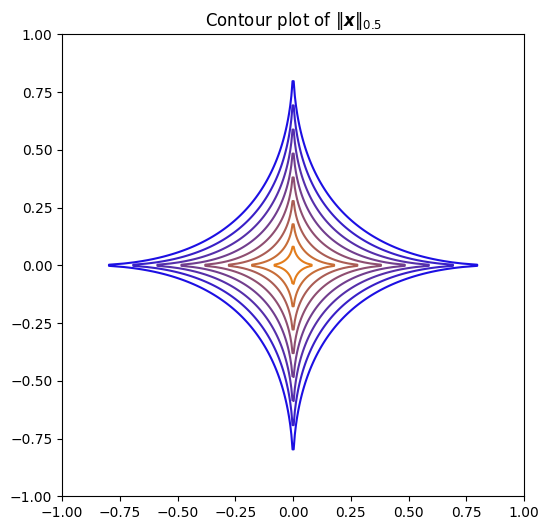

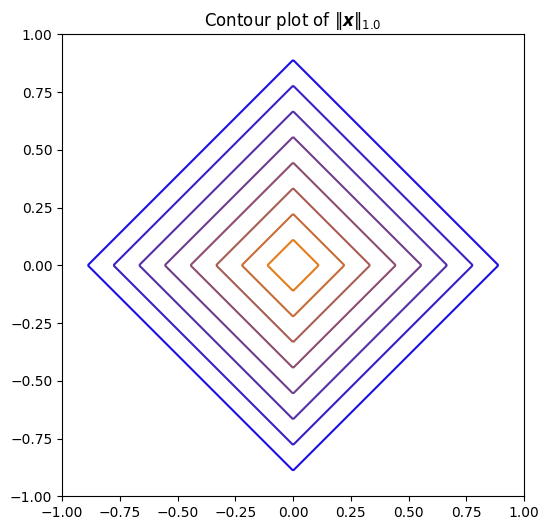

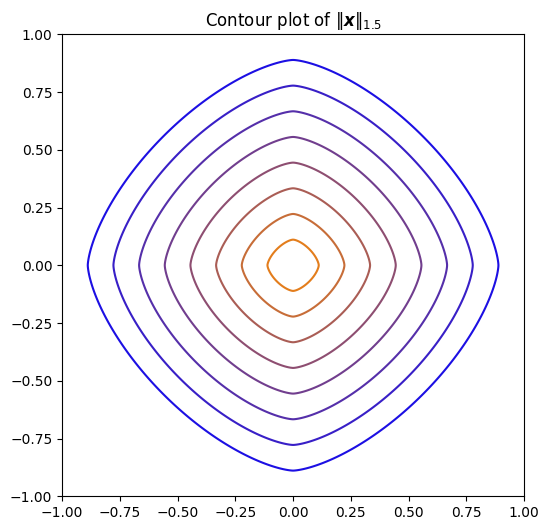

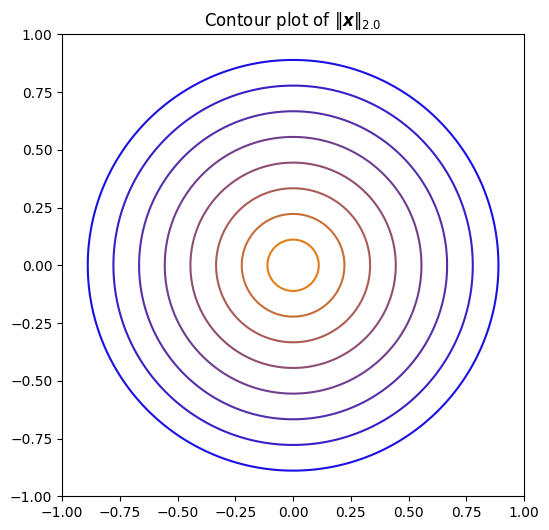

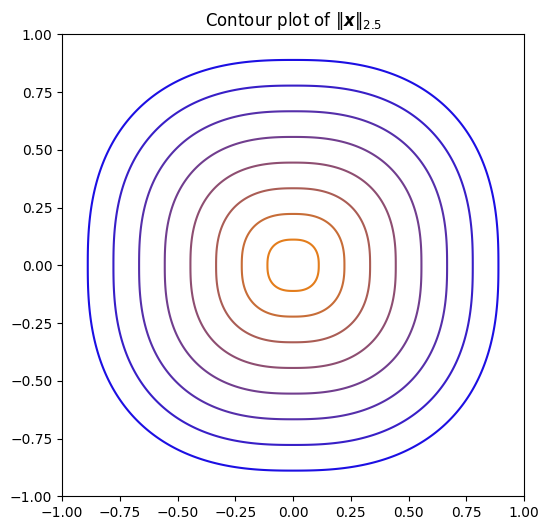

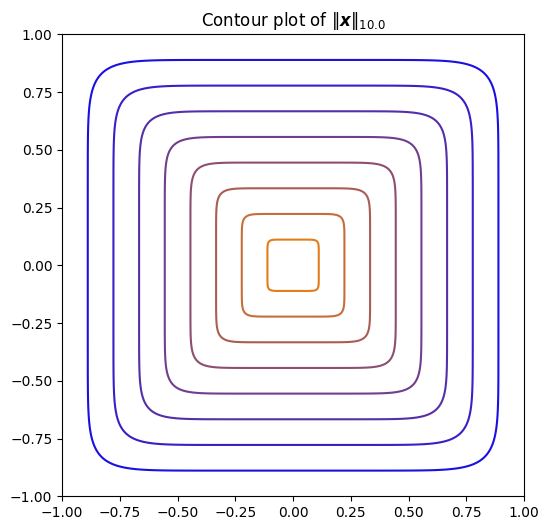

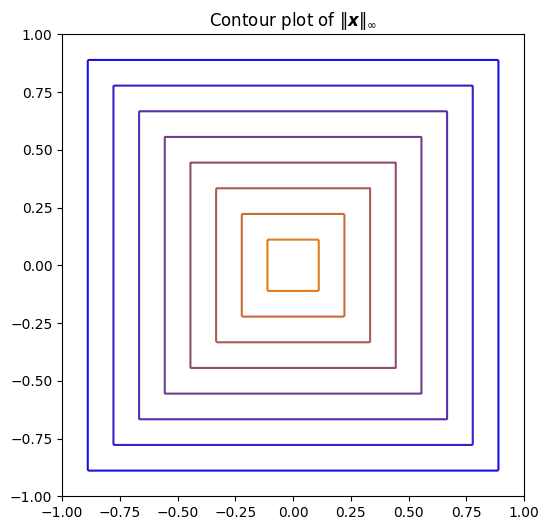

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.colors as mcolors

# Define the color palette
colors = {
    "white": "#FFFFFF",
    "light_gray": "#D3D3D3",
    "gray": "#808080",
    "black": "#000000",
    "green": "#008000",
    "blue": "#0000FF",
    "light_blue": "#ADD8E6",
    "light_light_blue": "#E0FFFF",
    "yellow": "#FFFF00",
    "orange": "#FFA500",
    "dark_orange": "#FF8C00",
    "purple": "#800080"
}

# Create a colormap from dark_orange to blue
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [colors["dark_orange"], colors["blue"]])

# Create a meshgrid
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x, y)

# List of p values, excluding 0
p_values = [0.5, 1.0, 1.5, 2.0, 2.5, 10.0, np.inf]

for p in p_values:
    # Compute the Lp norm
    if p == np.inf:
        Z = np.maximum(np.abs(X), np.abs(Y))  # p = infinity norm as max of absolute values
        p_label = 'infty'
        title_p = '\\infty'
    else:
        Z = (np.abs(X)**p + np.abs(Y)**p)**(1/p)
        p_label = p
        title_p = p
    
    # Restrict the range of Z to ensure the largest contours are within the visible region
    Z = np.clip(Z, 0, 1)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure the figure is square
    levels = np.linspace(0, 1, 10)  # Use 10 contour levels, but limit the range
    cp = ax.contour(X, Y, Z, levels=levels, cmap=cmap)  # Use the custom colormap for gradual coloring

    # Filter out the contours that extend beyond the visible region
    for collection in cp.collections:
        paths = collection.get_paths()
        paths_inside = []
        for path in paths:
            # Check if all vertices are inside the bounds [-1, 1]
            if np.all((path.vertices[:, 0] >= -1) & (path.vertices[:, 0] <= 1) &
                      (path.vertices[:, 1] >= -1) & (path.vertices[:, 1] <= 1)):
                paths_inside.append(path)
        collection.set_paths(paths_inside)

    ax.set_title(f'Contour plot of $\\|\\boldsymbol{{x}}\\|_{{{title_p}}}$')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal')  # Ensure the aspect ratio is equal

    # Save the plot
    plt.savefig(OUTPUT_DIR / f'lp_norm_{p_label}.png', bbox_inches='tight', pad_inches=0)
    plt.show(fig)
    plt.close(fig)